# Analysis: Illusory Tempo - Forced Directional Response II

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Set file paths
E1_DATAFILE = '../data/scores.csv'
E1_EXCFILE = '../data/excluded.txt'
FIGURE_PATH = './figures/'

# Set colors
color1 = '#512D6D'
color2 = '#F8485E'

# Set line widths
lw = 1.5
capsize = 3
msize = 7

# Set fonts
small = 12
medium = 16
large = 20
plt.rc('font', size=small)          # controls default text sizes
plt.rc('axes', titlesize=large)     # fontsize of the axes title
plt.rc('axes', labelsize=medium)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=small)    # fontsize of the tick labels
plt.rc('ytick', labelsize=small)    # fontsize of the tick labels
plt.rc('legend', fontsize=small)    # legend fontsize
plt.rc('figure', titlesize=large)  # fontsize of the figure title
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False

### Load and preprocess data

In [2]:
# Load scores
all_data1 = pd.read_csv(E1_DATAFILE)

# Remove excluded participants
excluded1 = np.loadtxt(E1_EXCFILE, dtype=int)
data1 = all_data1[~np.isin(all_data1.subject, excluded1)]

# Sort by task type
pc_data = data1[data1.task_type==0]
pp_data = data1[data1.task_type==1]

# Loftus & Masson (1994) method of plotting within-subject effects
pc_within = pc_data.copy()
subj_means = pc_data.groupby(['subject', 'octave', 'ioi']).mean().groupby('subject').mean().reset_index()
grand_mean = subj_means.mean()
for i, subj in enumerate(subj_means.subject):
    pc_within.loc[pc_within.subject == subj, 'dprime'] -= subj_means.dprime[i] - grand_mean.dprime
    pc_within.loc[pc_within.subject == subj, 'C'] -= subj_means.C[i] - grand_mean.C

pp_within = pp_data.copy()
subj_means = pp_data.groupby(['subject', 'octave', 'ioi']).mean().groupby('subject').mean().reset_index()
task_means = subj_means.mean().reset_index()
for i, subj in enumerate(subj_means.subject):
    pp_within.loc[pp_within.subject == subj, 'dprime'] -= subj_means.dprime[i] - grand_mean.dprime
    pp_within.loc[pp_within.subject == subj, 'C'] -= subj_means.C[i] - grand_mean.C

### Pitched Probe Condition

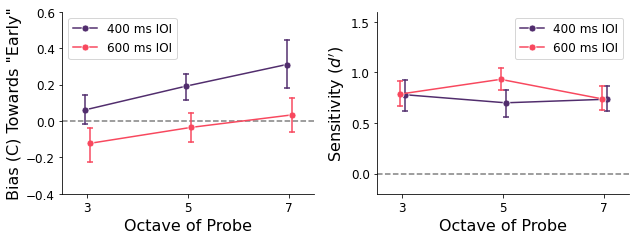

In [3]:
# Plot bias by tempo and octave
plt.subplot(121)
plt.axhline(0, ls='--', c='k', alpha=.5)
sns.lineplot(x=pp_within.octave[pp_within.ioi == 400]-.05, y='C', data=pp_within[pp_within.ioi == 400],
             ls='-', lw=lw, marker='o', ms=msize, color=color1, label='400 ms IOI',
             err_style='bars', err_kws=dict(capsize=capsize, lw=lw, capthick=lw))
sns.lineplot(x=pp_within.octave[pp_within.ioi == 600]+.05, y='C', data=pp_within[pp_within.ioi == 600],
             ls='-', lw=lw, marker='o', ms=msize, color=color2, label='600 ms IOI',
             err_style='bars', err_kws=dict(capsize=capsize, lw=lw, capthick=lw))
plt.xlim(2.5, 7.5)
plt.xticks([3, 5, 7])
plt.ylim(-.4, .6)
plt.xlabel('Octave of Probe')
plt.ylabel('Bias (C) Towards "Early"')

# Plot sensitivity by tempo and octave
plt.subplot(122)
plt.axhline(0, ls='--', c='k', alpha=.5)
sns.lineplot(x=pp_within.octave[pp_within.ioi == 400]+.05, y='dprime', data=pp_within[pp_within.ioi == 400],
             ls='-', lw=lw, marker='o', ms=msize, color=color1, label='400 ms IOI',
             err_style='bars', err_kws=dict(capsize=capsize, lw=lw, capthick=lw))
sns.lineplot(x=pp_within.octave[pp_within.ioi == 600]-.05, y='dprime', data=pp_within[pp_within.ioi == 600],
             ls='-', lw=lw, marker='o', ms=msize, color=color2, label='600 ms IOI',
             err_style='bars', err_kws=dict(capsize=capsize, lw=lw, capthick=lw))
plt.xlim(2.5, 7.5)
plt.xticks([3, 5, 7])
plt.ylim(-.2, 1.6)
plt.xlabel('Octave of Probe')
plt.ylabel('Sensitivity ($d\'$)')

plt.gcf().set_size_inches(9, 3.5)
plt.tight_layout()
plt.gcf().savefig(FIGURE_PATH + 'sdt_probe_within.svg')

### Pitched Context Condition

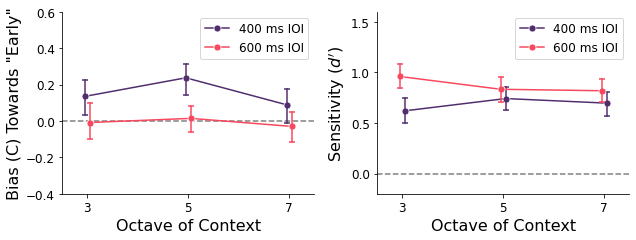

In [4]:
# Plot bias by tempo and octave
plt.subplot(121)
plt.axhline(0, ls='--', c='k', alpha=.5)
sns.lineplot(x=pc_within.octave[pc_within.ioi == 400]-.05, y='C', data=pc_within[pc_within.ioi == 400],
             ls='-', lw=lw, marker='o', ms=msize, color=color1, label='400 ms IOI',
             err_style='bars', err_kws=dict(capsize=capsize, lw=lw, capthick=lw))
sns.lineplot(x=pc_within.octave[pc_within.ioi == 600]+.05, y='C', data=pc_within[pc_within.ioi == 600],
             ls='-', lw=lw, marker='o', ms=msize, color=color2, label='600 ms IOI',
             err_style='bars', err_kws=dict(capsize=capsize, lw=lw, capthick=lw))
plt.xlim(2.5, 7.5)
plt.xticks([3, 5, 7])
plt.ylim(-.4, .6)
plt.xlabel('Octave of Context')
plt.ylabel('Bias (C) Towards "Early"')

# Plot sensitivity by tempo and octave
plt.subplot(122)
plt.axhline(0, ls='--', c='k', alpha=.5)
sns.lineplot(x=pc_within.octave[pc_within.ioi == 400]+.05, y='dprime', data=pc_within[pc_within.ioi == 400],
             ls='-', lw=lw, marker='o', ms=msize, color=color1, label='400 ms IOI',
             err_style='bars', err_kws=dict(capsize=capsize, lw=lw, capthick=lw))
sns.lineplot(x=pc_within.octave[pc_within.ioi == 600]-.05, y='dprime', data=pc_within[pc_within.ioi == 600],
             ls='-', lw=lw, marker='o', ms=msize, color=color2, label='600 ms IOI',
             err_style='bars', err_kws=dict(capsize=capsize, lw=lw, capthick=lw))
plt.xlim(2.5, 7.5)
plt.xticks([3, 5, 7])
plt.ylim(-.2, 1.6)
plt.xlabel('Octave of Context')
plt.ylabel('Sensitivity ($d\'$)')

plt.gcf().set_size_inches(9, 3.5)
plt.tight_layout()
plt.gcf().savefig(FIGURE_PATH + 'sdt_context_within.svg')